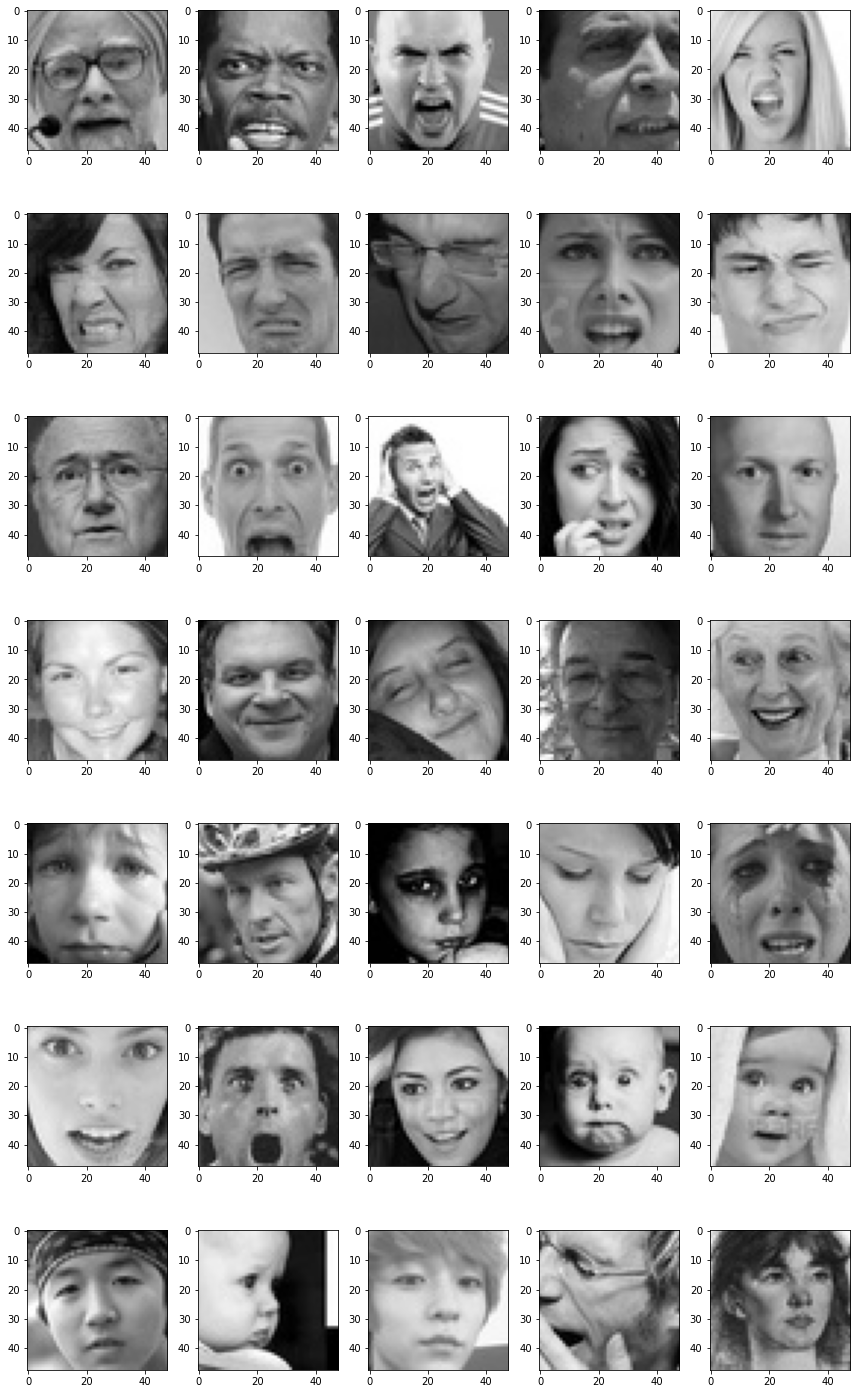

In [1]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "./images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "Training/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "Training/" + expression + "/" 
                       + os.listdir(base_path + "Training/" + expression)[i], 
                       target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam

# 기본 Sequential 방식으로 레이어를 한개씩 쌓음
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [3]:
# 2nd Convolution layer
model.add(Conv2D(128,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


In [4]:
# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 3nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory("./images/Training",
                                                    target_size=(48, 48),
                                                    color_mode="grayscale",
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    shuffle=True)
val_generator = datagen_validation.flow_from_directory("./images/PublicTest",
                                                    target_size=(48, 48),
                                                    color_mode="grayscale",
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    shuffle=False)


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [5]:
# 신경망 훈련 횟수 정의

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("Weights-{epoch:d}-{val_accuracy:.4f}.h5", 
                             monitor='val_accuracy', 
                             save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=50)

steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = val_generator.n//val_generator.batch_siz
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=100,
                    validation_data = val_generator,
                    validation_steps = steps_per_epoch,
                    callbacks=[checkpoint, early_stopping]
                   )

Epoch 1/10
224/224 [==============================] - ETA: 0s - loss: 2.0871 - accuracy: 0.2109
Epoch 00001: val_accuracy improved from -inf to 0.28348, saving model to Weights-1-0.2835.h5
224/224 [==============================] - 477s 2s/step - loss: 2.0871 - accuracy: 0.2109 - val_loss: 1.7862 - val_accuracy: 0.2835
Epoch 2/10
224/224 [==============================] - ETA: 0s - loss: 1.9030 - accuracy: 0.2590
Epoch 00002: val_accuracy improved from 0.28348 to 0.30664, saving model to Weights-2-0.3066.h5
224/224 [==============================] - 443s 2s/step - loss: 1.9030 - accuracy: 0.2590 - val_loss: 1.7708 - val_accuracy: 0.3066
Epoch 3/10
224/224 [==============================] - ETA: 0s - loss: 1.8037 - accuracy: 0.3037
Epoch 00003: val_accuracy improved from 0.30664 to 0.34431, saving model to Weights-3-0.3443.h5
224/224 [==============================] - 450s 2s/step - loss: 1.8037 - accuracy: 0.3037 - val_loss: 1.6829 - val_accuracy: 0.3443
Epoch 4/10
224/224 [===========